# Рубежный контроль №1

# Кондрахин Сергей ИУ5-61Б

# Вариант 9

# Задача 2

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.impute import SimpleImputer, MissingIndicator

In [2]:
cards = pd.read_csv("BankChurners.csv", engine='python')

In [3]:
cards.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,NaN,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,NaN,F,5,Graduate,Single,Less than $40K,Silver,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,NaN,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,NaN,F,4,High School,Unknown,Less than $40K,NaN,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Gold,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
cards.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'}, inplace = True )

In [5]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10077 non-null  float64
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10077 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
cards.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10077.0,4.630426e+01,8.018359e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1.438300e+03,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.000000e+00,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.000000e+00,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
cards.isna().sum()

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                50
Gender                       0
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category               50
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Credit_Limit                 0
Total_Revolving_Bal          0
Avg_Open_To_Buy              0
Total_Amt_Chng_Q4_Q1         0
Total_Trans_Amt              0
Total_Trans_Ct               0
Total_Ct_Chng_Q4_Q1          0
Avg_Utilization_Ratio        0
Naive_Bayes_mon_1            0
Naive_Bayes_mon_2            0
dtype: int64

In [8]:
cards.duplicated().sum()

0

In [9]:
cards.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_mon_1', 'Naive_Bayes_mon_2'],
      dtype='object')

In [10]:
cards.columns = cards.columns.str.lower()
cards.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'naive_bayes_mon_1', 'naive_bayes_mon_2'],
      dtype='object')

In [11]:
cards.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10077 non-null  float64
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10077 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [12]:
for col in ['naive_bayes_mon_2']:
    cards[col] = cards[col].astype(int)

In [13]:
optimized = cards.copy()

col_int = cards.select_dtypes(include = ['int'])
converted_int = col_int.apply(pd.to_numeric, downcast = 'unsigned')
optimized[converted_int.columns] = converted_int

for col in cards.select_dtypes(include = ['object']).columns:
    optimized[col] = optimized[col].astype('string')
    
cards = optimized

In [14]:
cards.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  uint32 
 1   attrition_flag            10127 non-null  string 
 2   customer_age              10077 non-null  float64
 3   gender                    10127 non-null  string 
 4   dependent_count           10127 non-null  uint8  
 5   education_level           10127 non-null  string 
 6   marital_status            10127 non-null  string 
 7   income_category           10127 non-null  string 
 8   card_category             10077 non-null  string 
 9   months_on_book            10127 non-null  uint8  
 10  total_relationship_count  10127 non-null  uint8  
 11  months_inactive_12_mon    10127 non-null  uint8  
 12  contacts_count_12_mon     10127 non-null  uint8  
 13  credit_limit              10127 non-null  float64
 14  total_

In [15]:
cards.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_mon_1,naive_bayes_mon_2
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,<NA>,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0
1,818770008,Existing Customer,NaN,F,5,Graduate,Single,Less than $40K,Silver,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,<NA>,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0
3,769911858,Existing Customer,NaN,F,4,High School,Unknown,Less than $40K,<NA>,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Gold,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0


card_category - категориальный

customer_age - количественный

### Категориальный

In [16]:
cards['card_category'].unique()

<StringArray>
[<NA>, 'Silver', 'Gold', 'Blue', 'Platinum']
Length: 5, dtype: string

In [17]:
cards['card_category'].isnull().sum()

50

В столбце отсутствует тип "перевыпуск карты", но присутствуют пропущенные значения. Возможно, под пропущенными значениями имеется в виду перевыпуск карты у клиента, поэтому заменим их константой "ReissueCard":

In [18]:
cards['card_category']= cards['card_category'].fillna('ReissueCard')

Теперь пустые значения отсутствуют:

In [19]:
np.unique(cards['card_category'])

array(['Blue', 'Gold', 'Platinum', 'ReissueCard', 'Silver'], dtype=object)

### Количественный

In [20]:
num_temp_data = cards [['customer_age']]
num_temp_data

,customer_age
0,45.0
1,NaN
2,51.0
3,NaN
4,40.0
...,...
10122,50.0
10123,41.0
10124,44.0
10125,30.0


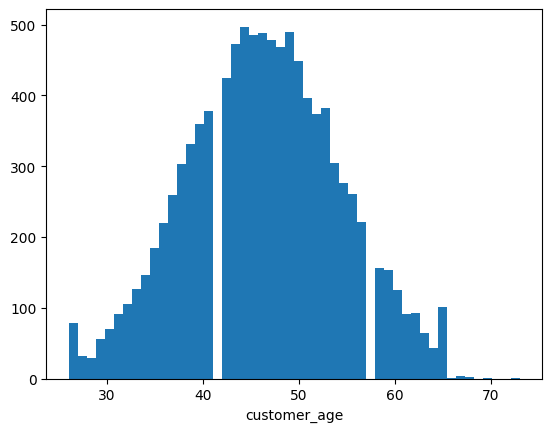

In [21]:
plt.hist(num_temp_data['customer_age'], 50)
plt.xlabel('customer_age')
plt.show()

In [22]:
num_temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,10077.0,46.304257,8.018359,26.0,41.0,46.0,52.0,73.0


In [23]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(num_temp_data)
mask_missing_values_only

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [24]:
#Стратегии заполнения
strategies=['mean', 'median', 'most_frequent']

In [25]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    filled_data = data_num_imp[mask_missing_values_only]
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [26]:
test_num_impute_col(num_temp_data, 'customer_age', strategies[0])

('customer_age', 'mean', 50, 46.30425721941054, 46.30425721941054)

In [27]:
test_num_impute_col(num_temp_data, 'customer_age', strategies[1])

('customer_age', 'median', 50, 46.0, 46.0)

In [28]:
test_num_impute_col(num_temp_data, 'customer_age', strategies[2])

('customer_age', 'most_frequent', 50, 44.0, 44.0)

Так как в столбце customer_age данные распределены одномодально, можно заполнить пропуски медианным значением.

In [29]:
cards['customer_age'] = cards['customer_age'].fillna(cards['customer_age'].median())

In [30]:
cards.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_mon_1,naive_bayes_mon_2
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,ReissueCard,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0
1,818770008,Existing Customer,46.0,F,5,Graduate,Single,Less than $40K,Silver,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,ReissueCard,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0
3,769911858,Existing Customer,46.0,F,4,High School,Unknown,Less than $40K,ReissueCard,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Gold,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0


При заполнении пропусков я использовал импьютацию константным и медианным значениями.

C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_3532\680754909.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  m =np.triu(np.ones_like(cards.corr(), dtype=bool))
C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_3532\680754909.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cards.corr(), mask = m, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');


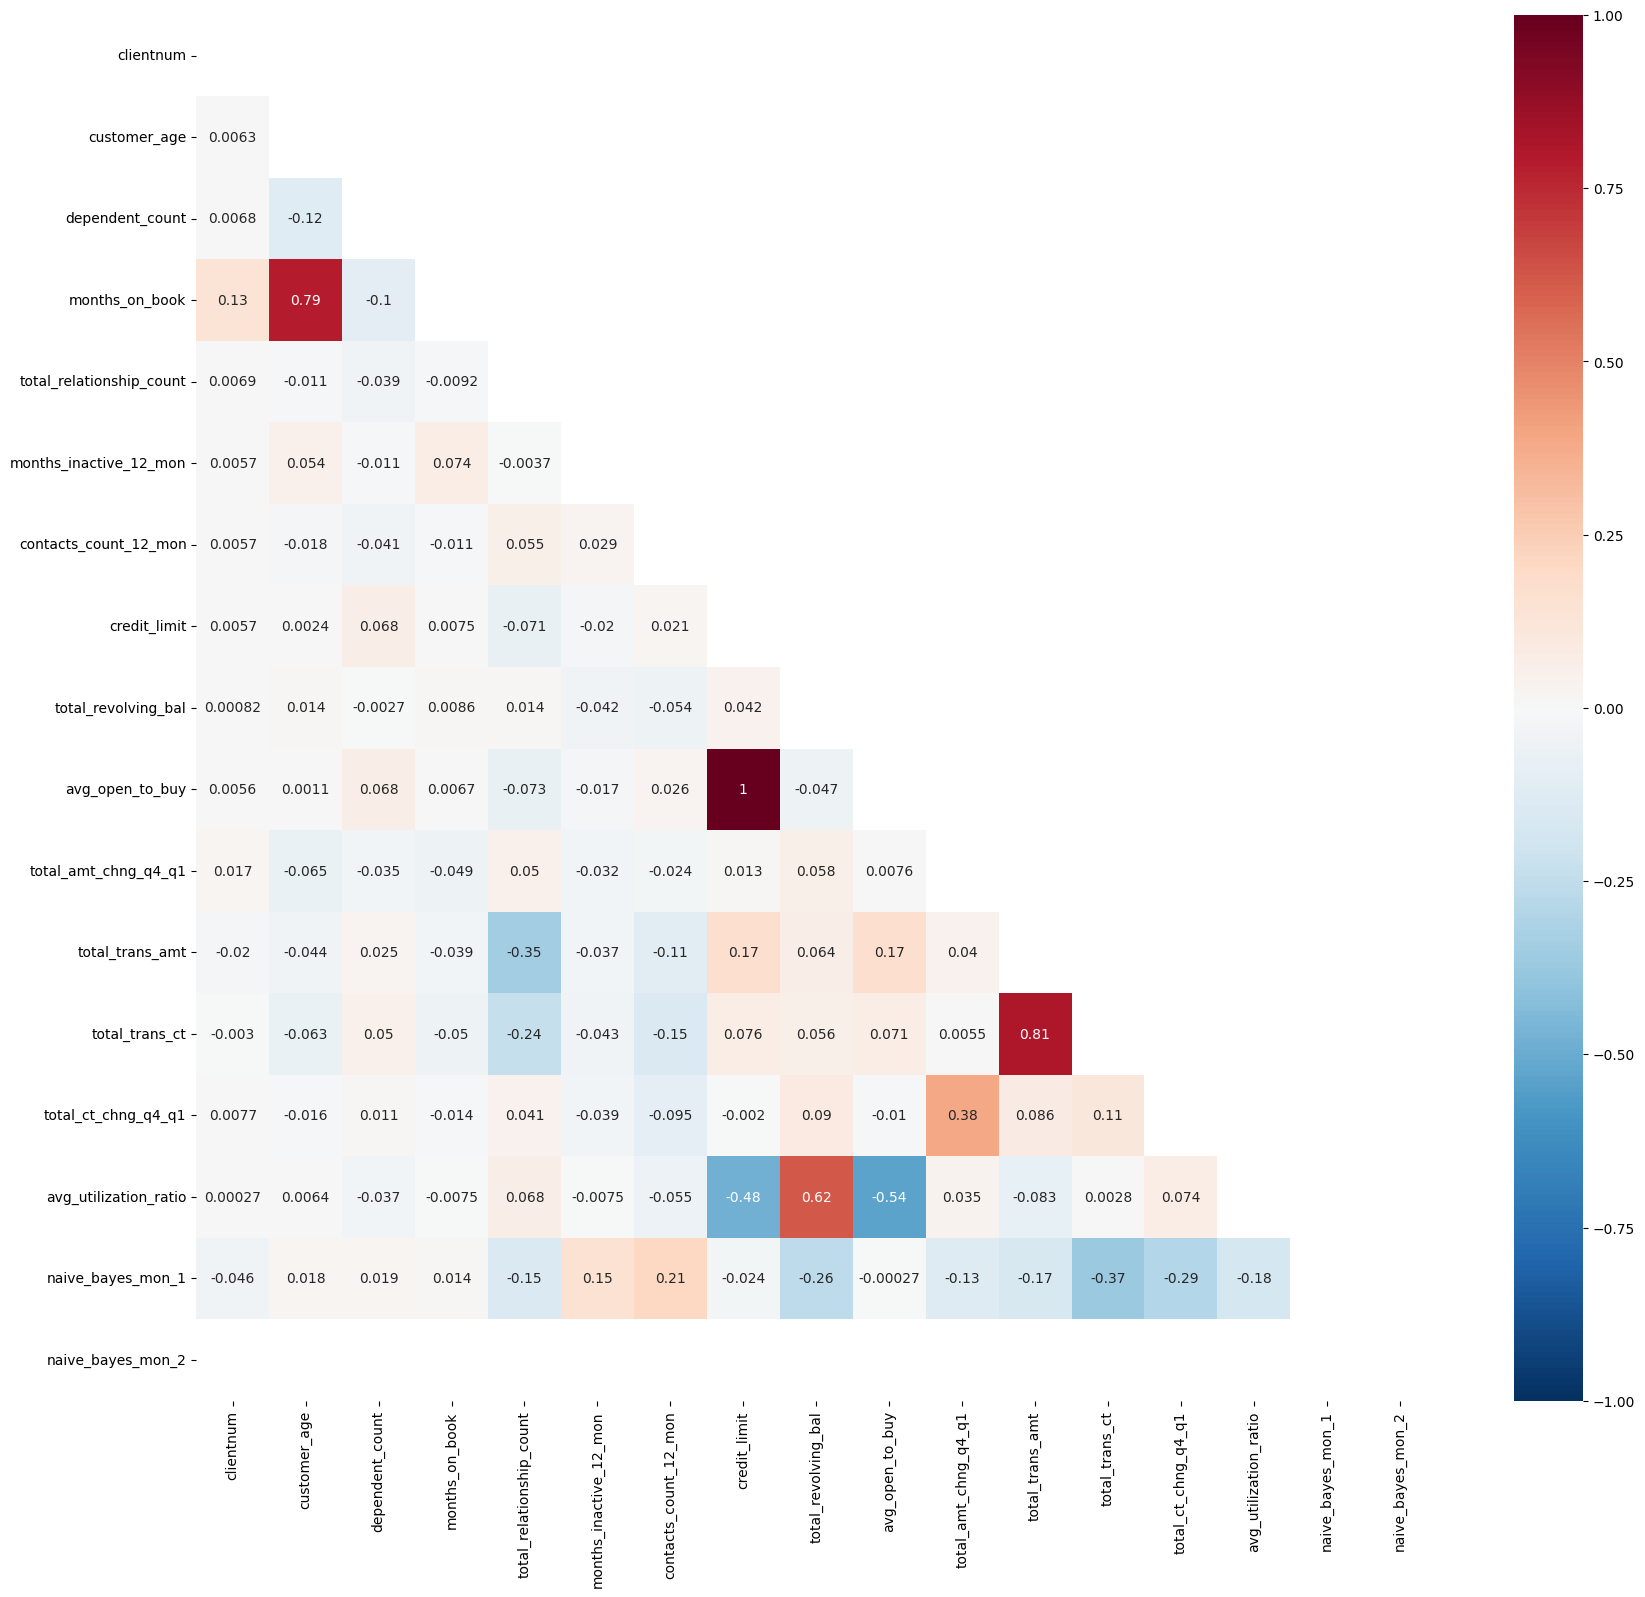

In [31]:
plt.figure(figsize = (20,18))

m =np.triu(np.ones_like(cards.corr(), dtype=bool))

sns.heatmap(cards.corr(), mask = m, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');

По матрице корреляции видна хорошая зависимость и корреляция целевого признака "credit_limit" с колонками "avg_open_to_buy" и "avg_utilization_ratio".

Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

В качестве примера можно решать задачу регрессии и строить модель зависимости признака "credit_limit" - кредитный лимит от остальных признаков. В данном случае стоит использовать в модели признаки "avg_open_to_buy" и "avg_utilization_ratio", так как они хорошо коррелируют с целевым признаком. И наоборот, не стоит одновременно брать оба признака "total_trans_ct" и "total_trans_amt", так они сами между собой очень сильно коррелируют и чуть ли нелинейно зависимы, а это может негативно повлиять на обучение и результат данной модели.

Для улучшения качества модели, возможно стоит убрать из рассмотрения слабо коррелирующие с целевым признаки колонки.

## Диаграмма рассеяния

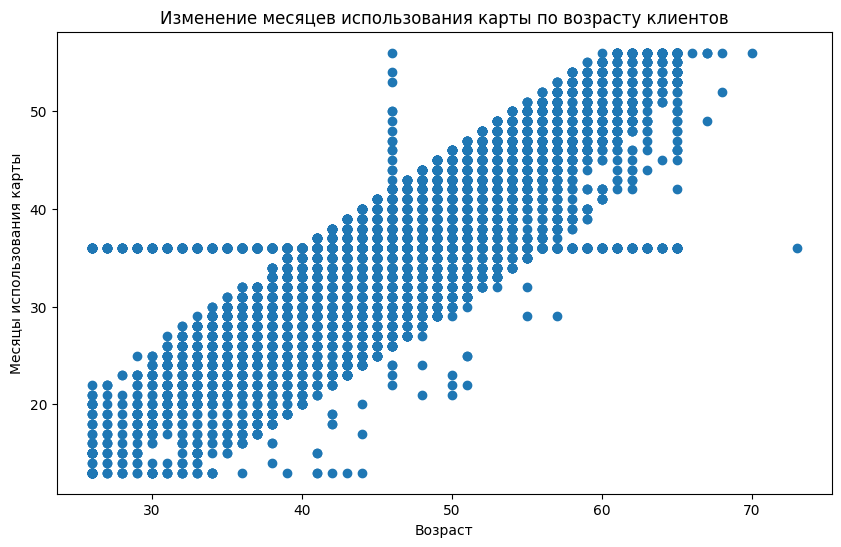

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = cards['customer_age'], y = cards['months_on_book'])
plt.title('Изменение месяцев использования карты по возрасту клиентов')
plt.xlabel("Возраст")
plt.ylabel("Месяцы использования карты")

plt.show()